<a href="https://colab.research.google.com/github/bankmanx9x/python/blob/master/pandas_df_to_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas dataframe to sql table (MySQL, PostgreSQL, sqlite)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

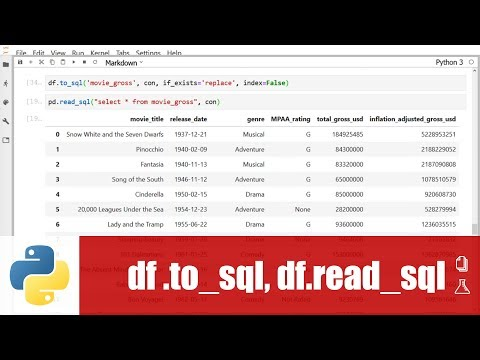

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('M6du6UnpQvU', width=720, height=405)

In [ ]:
import pandas as pd

# conda install sqlalchemy psycopg2 pymysql
# pip install sqlalchemy psycopg2 pymysql
from sqlalchemy import create_engine

## MySQL, PostgreSQL, SQLite engine/connection

In [ ]:
user='apollo'
pwd='1234'
dbname='titan'
# host='localhost'
host='192.168.9.114' # windows 10 youtube

# mysql
# port=3306
# con = create_engine(f'mysql+pymysql://{user}:{pwd}@{host}:{port}/{dbname}')

# postgresql
# port=5432
# con=create_engine(f'postgresql://{user}:{pwd}@{host}:{port}/{dbname}')

# sqlite
con = create_engine(f'sqlite:///{dbname}.sqlite')
print(con)

Engine(sqlite:///titan.sqlite)


In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
36,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
194,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact
138,mercury,mountaineer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv


In [ ]:
df.to_sql('mpg', con, if_exists='replace', index=False)

In [ ]:
df=pd.read_sql("select * from mpg where class = 'suv'", con)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
1,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
2,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
3,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
4,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.xlsx'
df=pd.read_excel(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,NaN
1,Baseball Nut,160,9.0,0.2,19,13,3.0,NaN
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,NaN
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,NaN
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,NaN


In [ ]:
df.to_sql('baskin', con, if_exists='replace', index=False)

In [ ]:
con.table_names()

['baskin', 'mpg']

## Ex 2

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/disney_movie/disney_gross.csv')
df.sample(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
310,The 13th Warrior,"Aug 27, 1999",Action,R,"$32,698,899","$54,262,148"
359,Reign of Fire,"Feb 19, 2002",Action,PG-13,"$43,061,982","$62,480,631"
426,The Greatest Game Ever Played,"Sep 30, 2005",Drama,PG,"$15,331,289","$20,162,672"
399,The Ladykillers,"Mar 26, 2004",Comedy,R,"$39,692,139","$53,881,593"
179,The Lion King,"Jun 15, 1994",Adventure,G,"$422,780,140","$761,640,898"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
movie_title                 579 non-null object
release_date                579 non-null object
genre                       562 non-null object
MPAA_rating                 523 non-null object
total_gross                 579 non-null object
inflation_adjusted_gross    579 non-null object
dtypes: object(6)
memory usage: 27.2+ KB


In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/disney_movie/disney_gross.csv'
df=pd.read_csv(url, parse_dates=['release_date'])
df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
movie_title                 579 non-null object
release_date                579 non-null datetime64[ns]
genre                       562 non-null object
MPAA_rating                 523 non-null object
total_gross                 579 non-null object
inflation_adjusted_gross    579 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 27.2+ KB


In [ ]:
df.total_gross.str.replace('[\D]', '')

0      184925485
1       84300000
2       83320000
3       65000000
4       85000000
5       28200000
6       93600000
7        9464608
8      153000000
9       25381407
10      10218316
11       9230769
12      22182353
13     141843000
14      21540050
15      55675257
16      18607492
17      17871174
18      31916500
19      25942000
20             0
21      48775599
22      28000000
23      35841901
24       2900000
25      11000000
26      16000000
27             0
28      43899231
29             0
         ...    
549    333172112
550     54235441
551     66954149
552    222527828
553    128002372
554     12429583
555     44480275
556    201151353
557     16432322
558    459005868
559     93436322
560    356461711
561    180202163
562     72313754
563    123087120
564    936662225
565     27569558
566    341268248
567    364001123
568      7895708
569    408084349
570     77042381
571    486295561
572     55483770
573     76233151
574     12545979
575      8874389
576    2325329

In [ ]:
pd.to_numeric(df.total_gross.str.replace('[\D]', ''), errors='coerce')

0      184925485
1       84300000
2       83320000
3       65000000
4       85000000
5       28200000
6       93600000
7        9464608
8      153000000
9       25381407
10      10218316
11       9230769
12      22182353
13     141843000
14      21540050
15      55675257
16      18607492
17      17871174
18      31916500
19      25942000
20             0
21      48775599
22      28000000
23      35841901
24       2900000
25      11000000
26      16000000
27             0
28      43899231
29             0
         ...    
549    333172112
550     54235441
551     66954149
552    222527828
553    128002372
554     12429583
555     44480275
556    201151353
557     16432322
558    459005868
559     93436322
560    356461711
561    180202163
562     72313754
563    123087120
564    936662225
565     27569558
566    341268248
567    364001123
568      7895708
569    408084349
570     77042381
571    486295561
572     55483770
573     76233151
574     12545979
575      8874389
576    2325329

In [ ]:
df['total_gross_usd']=pd.to_numeric(df.total_gross.str.replace('[\D]', ''), errors='coerce')
df['inflation_adjusted_gross_usd']=pd.to_numeric(df.inflation_adjusted_gross.str.replace('[\D]', ''),
                                                 errors='coerce')

df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,total_gross_usd,inflation_adjusted_gross_usd
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251",184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052",84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808",83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579",65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730",85000000,920608730


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
movie_title                     579 non-null object
release_date                    579 non-null datetime64[ns]
genre                           562 non-null object
MPAA_rating                     523 non-null object
total_gross                     579 non-null object
inflation_adjusted_gross        579 non-null object
total_gross_usd                 579 non-null int64
inflation_adjusted_gross_usd    579 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 36.3+ KB


In [ ]:
df.drop(columns=['total_gross', 'inflation_adjusted_gross'], inplace=True)
df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross_usd,inflation_adjusted_gross_usd
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [ ]:
df.to_sql('movie_gross', con, if_exists='replace', index=False)

In [ ]:
pd.read_sql("select * from movie_gross", con)

,movie_title,release_date,genre,MPAA_rating,total_gross_usd,inflation_adjusted_gross_usd
0,Snow White and the Seven Dwarfs,1937-12-21 00:00:00.000000,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09 00:00:00.000000,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13 00:00:00.000000,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12 00:00:00.000000,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15 00:00:00.000000,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23 00:00:00.000000,Adventure,None,28200000,528279994
6,Lady and the Tramp,1955-06-22 00:00:00.000000,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29 00:00:00.000000,Drama,None,9464608,21505832
8,101 Dalmatians,1961-01-25 00:00:00.000000,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16 00:00:00.000000,Comedy,None,25381407,310094574


## ex 3: multiple csv files

In [ ]:
d={
    'tips': 'https://github.com/prasertcbs/basic-dataset/raw/master/seaborn/tips.csv',
    'titanic': 'https://github.com/prasertcbs/basic-dataset/raw/master/seaborn/titanic.csv',
    'starbucks': 'https://github.com/prasertcbs/basic-dataset/raw/master/starbucks_menu/starbucks_menu.csv',
    'province': 'https://github.com/prasertcbs/basic-dataset/raw/master/province_info.csv'
}

In [ ]:
for key, value in d.items():
    print(f'{key}: {value}')
    df=pd.read_csv(value)
    print(df.columns)
    df.columns = df.columns.str.strip().str.lower().str.replace(r'[()%,:]', '').str.replace(r'[ -.]', '_')
    df.to_sql(key, con, index=False, if_exists='replace')

tips: https://github.com/prasertcbs/basic-dataset/raw/master/seaborn/tips.csv
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
titanic: https://github.com/prasertcbs/basic-dataset/raw/master/seaborn/titanic.csv
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
starbucks: https://github.com/prasertcbs/basic-dataset/raw/master/starbucks_menu/starbucks_menu.csv
Index(['Menu', 'Category', 'Calories', 'Fat_g', 'Carb_g', 'Fiber_g',
       'Protein_g', 'Sodium'],
      dtype='object')
province: https://github.com/prasertcbs/basic-dataset/raw/master/province_info.csv
Index(['region', 'name_th', 'name_en', 'population', 'area_km2', 'abbr',
       'abbr3', 'iso'],
      dtype='object')


In [ ]:
con.table_names()

['baskin', 'movie_gross', 'mpg', 'province', 'starbucks', 'tips', 'titanic']

In [ ]:
df=pd.read_sql("select * from province", con)
df.head()

,region,name_th,name_en,population,area_km2,abbr,abbr3,iso
0,เหนือ,เชียงราย,Chiang Rai,1287615,11678.4,ชร,CRI,TH-57
1,เหนือ,เชียงใหม่,Chiang Mai,1640479,20107.0,ชม,CMI,TH-50
2,เหนือ,น่าน,Nan,476363,11472.1,นน,NAN,TH-55
3,เหนือ,พะเยา,Phayao,486304,6335.1,พย,PYO,TH-56
4,เหนือ,แพร่,Phrae,447564,6538.6,พร,PRE,TH-54


In [ ]:
df=pd.read_sql("select * from titanic", con)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1
